In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from scipy.stats import shapiro
from scipy.stats import ttest_rel
from math import sqrt
dfSales = pd.read_csv("InsuranceSales.csv")
dfSales.head()
print( "Mean of Old Scheme",dfSales["Old Scheme"].mean())
print( "Mean of New Scheme",dfSales["New Scheme"].mean())

Mean of Old Scheme 68.03333333333333
Mean of New Scheme 72.03333333333333


In [2]:
dfSales[["Old Scheme","New Scheme"]].describe()

,Old Scheme,New Scheme
count,30.000000,30.000000
mean,68.033333,72.033333
std,20.455980,24.062395
min,28.000000,32.000000
25%,54.000000,55.000000
50%,67.000000,74.000000
75%,81.500000,85.750000
max,110.000000,122.000000


In [3]:
dfSales[["Old Scheme","New Scheme"]].plot(kind='Box')

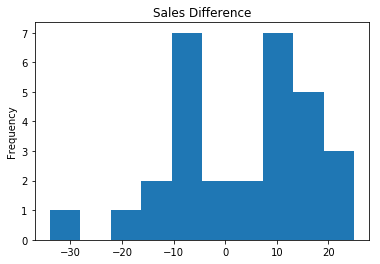

In [4]:
#Check for Normality
dfSales.diff = dfSales["New Scheme"] - dfSales["Old Scheme"]
dfSales.diff.plot(kind='hist',title='Sales Difference')


In [5]:
stat, p =shapiro(dfSales.diff)
print('Statistics = %.3f, P=%.3f' %(stat, p))# P > alpha means normal distribution

Statistics = 0.940, P=0.089


In [6]:
#Use the five percent significance test over the data to determine the p value to check new scheme has significantly raised outputs? (8 points)

In [7]:
two_sample = ttest_rel(dfSales['Old Scheme'],dfSales['New Scheme'])
two_sample

Ttest_relResult(statistic=-1.5559143823544377, pvalue=0.13057553961337662)

In [8]:
# Answer: Since the pvalue is greater than Alpha, There is no significant improvement

In [9]:
#What conclusion does the test (p-value) lead to? (2 points)
#Answer: The pvalue is 0.1305 which is greater than 0.05 (Alpha value). So there is no improvement in sales.

In [10]:
#The probability of a type 1 error? (2 points)
#Answer: The probalility of Type 1 error is 0.05 i.e alpha

In [ ]:
#What is the p- value of the hypothesis test if we test for a difference of $5000? (8 points)
import scipy.stats as stats
dfSales.diff = dfSales.diff*1000
mu = 5000
n = 30
xBar = dfSales.diff.mean()
sd = dfSales.diff.std()
se = sd/sqrt(n)
tstat = (xBar - mu)/se
df = n-1
Beta = (stats.t.cdf(tstat,df=df))
Beta #This beta is from -infinity to 5000. So we should do 1-beta to get the 5000 to + infinity which is the acceptance of alternate hypothesis
acceptanceP = 1-Beta
print("p- value of the hypothesis test is: ",acceptanceP)

In [ ]:
# Power of the test (5 points)
# Answer: Power of test is 1- Beta value.
print("Power of Test = ", 1-Beta)